# 資料匯入與預處理

In [1]:
import numpy as np
from keras.datasets import mnist

from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Dropout, Flatten

Using TensorFlow backend.


In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

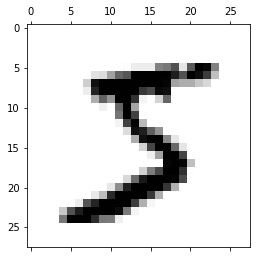

In [3]:
import matplotlib.pyplot as plt
train_img = np.reshape(X_train[:1, :], (28, 28))
plt.matshow(train_img, cmap = plt.get_cmap('binary'))
plt.show()

In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
# Input shape format: (28, 28, 1)
# If 128x128 RGB, (128,128,3)
X_train = X_train.reshape(X_train.shape[0],28,28,1) / 255
X_test = X_test.reshape(X_test.shape[0],28,28,1) / 255

In [6]:
X_train.shape

(60000, 28, 28, 1)

In [7]:
# one-hot encoding
y_train_onehot = np_utils.to_categorical(y_train, num_classes=10)
y_test_onehot = np_utils.to_categorical(y_test, num_classes=10)

# Convolution layer

## Conv2D
#### filters: 濾鏡數量
#### kernel_size: 濾鏡大小
#### strides: 步幅(width, height)或單一數值
#### padding: 'same'-與input shape相同, 'valid'-不使用padding
#### input_shape: 當Conv2D是Sequential第一層時要加上的參數

In [8]:
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=(5,5), padding='same', input_shape=(28,28,1), activation='relu'))

In [9]:
prediction = model.predict_classes(X_train[:1,:])

1/1 [==============================] - 0s


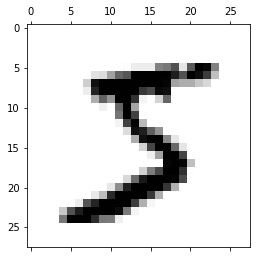

In [10]:
import matplotlib.pyplot as plt
train_img = np.reshape(X_train[:1, :], (28, 28))
plt.matshow(train_img, cmap = plt.get_cmap('binary'))
plt.show()

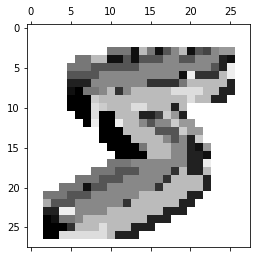

In [11]:
import matplotlib.pyplot as plt
cov_img = np.reshape(prediction[:1, :], (28, 28))
plt.matshow(cov_img, cmap = plt.get_cmap('binary'))
plt.show()

## Max-pooling layer
#### pool_size: pool大小

In [12]:
model = Sequential()
model.add(Conv2D(filters=16,kernel_size=(5,5), padding='same', input_shape=(28,28,1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [13]:
prediction = model.predict_classes(X_train[:1,:])
prediction[:1,:]

1/1 [==============================] - 0s


array([[[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
        [ 0,  0,  0,  0,  0,  3,  8,  8,  8,  8,  8,  8,  8,  0],
        [ 0,  0,  3,  8,  8,  8,  8,  8,  8,  8,  8,  2,  2,  0],
        [ 0,  0,  8, 15,  8,  4,  4,  4,  4,  4,  4,  4,  6,  0],
        [ 0,  0,  7,  4,  4,  4,  4,  4,  4,  4,  4,  3,  3,  0],
        [ 0,  0,  7, 12,  4,  4,  4,  2,  3,  3,  0,  0,  0,  0],
        [ 0,  0,  0,  7,  7,  4,  8,  2,  2,  7,  1,  0,  0,  0],
        [ 0,  0,  0,  0,  7, 12,  8,  4,  4,  2,  7,  1,  0,  0],
        [ 0,  0,  0,  0,  0,  3,  4,  4,  8,  5,  5,  2,  0,  0],
        [ 0,  0,  0,  3,  8,  8,  8,  2,  4,  4,  6,  1,  0,  0],
        [ 0,  3,  8,  8,  8,  8,  4,  4,  4,  4,  3, 13,  0,  0],
        [ 0,  8,  8,  8,  4,  4,  4,  4,  3,  3, 13,  0,  0,  0],
        [ 0,  4,  4,  4,  4,  4,  3,  3, 13,  0,  0,  0,  0,  0],
        [ 0, 12,  2,  2,  3,  3, 13,  0,  0,  0,  0,  0,  0,  0]]])

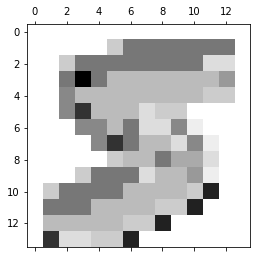

In [14]:
import matplotlib.pyplot as plt
max_pooling_img = np.reshape(prediction[:1, :], (14, 14))
plt.matshow(max_pooling_img, cmap = plt.get_cmap('binary'))
plt.show()

# CNN

In [15]:
model = Sequential()
# Conv + Max-pooling 1
model.add(Conv2D(filters=16,kernel_size=(5,5),padding='same', input_shape=(28,28,1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Conv + Max-pooling 2
model.add(Conv2D(filters=36, kernel_size=(5,5), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Flatten層: 壓成一維
# Dense 接在內層不用input_dim，其他參數先用預設值
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='normal'))
model.add(Dropout(0.5))

model.add(Dense(10,activation='softmax'))

In [16]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 36)        14436     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 7, 36)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 36)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1764)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               225920    
__________

In [17]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy']) 
history=model.fit(X_train, y_train_onehot, validation_split=0.2, epochs=5, batch_size=300, verbose=1)

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 97s - loss: 0.5003 - acc: 0.8427 - val_loss: 0.0947 - val_acc: 0.9718
Epoch 2/5
48000/48000 [==============================] - 93s - loss: 0.1369 - acc: 0.9598 - val_loss: 0.0623 - val_acc: 0.9819
Epoch 3/5
48000/48000 [==============================] - 91s - loss: 0.0983 - acc: 0.9703 - val_loss: 0.0535 - val_acc: 0.9845
Epoch 4/5
48000/48000 [==============================] - 90s - loss: 0.0795 - acc: 0.9762 - val_loss: 0.0451 - val_acc: 0.9868
Epoch 5/5
48000/48000 [==============================] - 92s - loss: 0.0671 - acc: 0.9799 - val_loss: 0.0426 - val_acc: 0.9886


In [18]:
import matplotlib.pyplot as plt
%matplotlib inline
def plot_train_history(history, train_metrics, val_metrics):
    plt.plot(history.history.get(train_metrics),'-o')
    plt.plot(history.history.get(val_metrics),'-o')
    plt.ylabel(train_metrics)
    plt.xlabel('Epochs')
    plt.legend(['train', 'validation'])

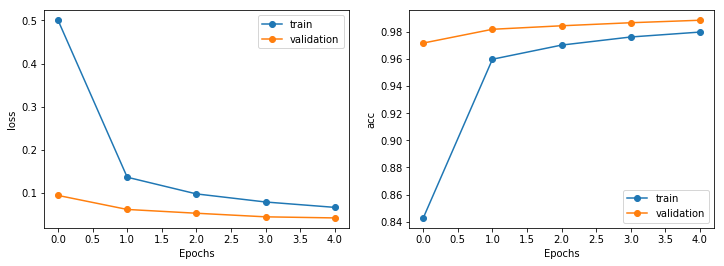

In [19]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plot_train_history(history, 'loss','val_loss')
plt.subplot(1,2,2)
plot_train_history(history, 'acc','val_acc')

In [20]:
model.evaluate(X_train, y_train_onehot)

59968/60000 [============================>.] - ETA: 0s

[0.032471477426732114, 0.99011666666666664]

### 預測
可以再自行用for-loop把錯誤/正確的資料一一顯示出來看

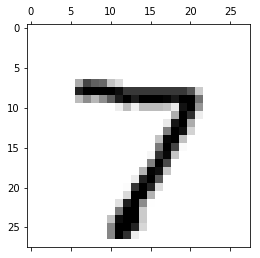

In [21]:
import matplotlib.pyplot as plt
test_img = np.reshape(X_test[:1, :], (28, 28))
plt.matshow(test_img, cmap = plt.get_cmap('binary'))
plt.show()

In [22]:
model.predict_classes(X_test[:1,:])

1/1 [==============================] - 0s


array([7])

## softmax & prediction

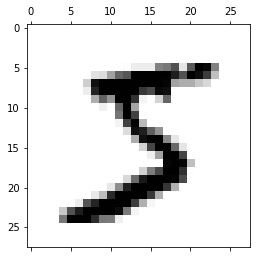

In [23]:
import matplotlib.pyplot as plt
test_img = np.reshape(X_train[:1, :], (28, 28))
plt.matshow(test_img, cmap = plt.get_cmap('binary'))
plt.show()

In [24]:
model.predict(X_train[:1,:])

array([[  8.94227625e-09,   4.66155740e-07,   1.24127766e-08,
          5.66450618e-02,   6.27837409e-08,   9.43254232e-01,
          1.93743358e-06,   1.09289022e-06,   2.11253519e-05,
          7.59907634e-05]], dtype=float32)

<Container object of 10 artists>

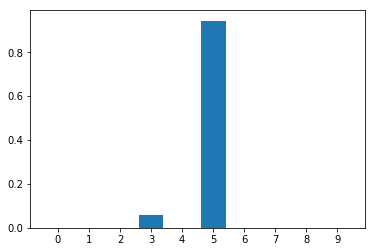

In [25]:
y = model.predict(X_train[:1,:]).reshape(-1)
x = [i for i in range(len(y))]
plt.xticks(x) # show all xticks
plt.bar(x,y)

In [26]:
model.predict_classes(X_train[:1,:])

1/1 [==============================] - 0s


array([5])

# 混淆矩陣 (Confusion Matrix)

In [27]:
from sklearn.metrics import classification_report

y_pred = model.predict_classes(X_test)
print(classification_report(y_test, y_pred))

 9952/10000 [============================>.] - ETA: 0s             precision    recall  f1-score   support

          0       0.99      0.99      0.99       980
          1       0.99      0.99      0.99      1135
          2       0.99      0.99      0.99      1032
          3       0.98      0.99      0.99      1010
          4       0.99      0.99      0.99       982
          5       0.99      0.99      0.99       892
          6       0.99      0.99      0.99       958
          7       0.99      0.99      0.99      1028
          8       0.97      0.99      0.98       974
          9       0.99      0.97      0.98      1009

avg / total       0.99      0.99      0.99     10000

